## Question 1

In [0]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from numpy.linalg import inv,pinv
from numpy.linalg import det
from numpy.linalg import norm
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.covariance import empirical_covariance as ecov

from sklearn.datasets import make_spd_matrix # crating positive semidefinite matrix
from numpy import linalg as LA
%matplotlib inline

In [0]:
def Sample_Generator(p_w1,p_w2):
  N = np.random.uniform( size=999)
  n1=N[N<=p_w1]
  n2=N[(N>p_w1)]
  return(len(n1),len(n2))

In [0]:
def viz_data_points_single(o1,c):
  
  
  plt.figure(figsize=(15,15))
  plt.scatter(o1[0],o1[1],label='label_{}'.format(c))
  
  plt.title('Visualization of multivariate data points')
  
  plt.legend()
  plt.xlabel('X-axis')
  plt.ylabel('Y-axis')
  plt.xlim(-4,6)
  plt.ylim(-2.5,2.5)

In [0]:
def viz_data_points(o1,o2):
  
  
  plt.figure(figsize=(15,15))
  plt.scatter(o1[0],o1[1],label='label_1')
  plt.scatter(o2[0],o2[1],label='label_2')
  plt.title('Visualization of multivariate data points')
  
  plt.legend()
  plt.xlabel('X-axis')
  plt.ylabel('Y-axis')
  plt.xlim(-4,6)
  plt.ylim(-2.5,2.5)

In [0]:
def make_meshgrid(x, y, h=.1):
   
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy

In [0]:
def Decision_Boundary1(w1_1,w1_2,w2_1,w2_2,xx,yy,a):
  plt.figure(figsize=(15,15))
  plt.contourf(xx, yy, a,cmap=plt.cm.Pastel1, alpha=0.8)
  plt.scatter(w1_1.iloc[:,0],w1_1.iloc[:,1],label='class 1 predicted as class 1')
  plt.scatter(w1_2.iloc[:,0],w1_2.iloc[:,1],label='class 1 predicted as class 2',marker='^')
  
  plt.scatter(w2_1.iloc[:,0],w2_1.iloc[:,1],label='class 2 predicted as class 1',marker='^')
  plt.scatter(w2_2.iloc[:,0],w2_2.iloc[:,1],label='class 2 predicted as class 2')
  
  
  plt.title('Class predictions with decision Boundary')
  plt.legend()
  plt.xlabel('X-axis')
  plt.ylabel('Y-axis')
  plt.xlim(-4,6)
  plt.ylim(-2.5,2.5)

In [0]:
def Single_class_boundary1(w1_1,w1_2,xx,yy,a,c1):
  plt.figure(figsize=(15,15))
  plt.contourf(xx, yy, a,cmap=plt.cm.Pastel1, alpha=0.8)
  
  plt.scatter(w1_1.iloc[:,0],w1_1.iloc[:,1],label='class {} predicted as class {}'.format(c1,1))
  plt.scatter(w1_2.iloc[:,0],w1_2.iloc[:,1],label='class {} predicted as class {}'.format(c1,2))
  

  plt.title('Class {} predictions with decision Boundary'.format(c1))
  plt.legend()
  plt.xlabel('X-axis')
  plt.ylabel('Y-axis')
  plt.xlim(-4,6)
  plt.ylim(-2.5,2.5)

In [0]:
def lda_simple(x1,x2,n1,n2):
  y1=np.ones(n1)
  y2=np.ones(n2)
  plt.figure(figsize=(10,10))
  plt.scatter(x1,y1*2,label="label 1")
  plt.scatter(x2,y2,label="label 2")
  plt.legend()
  plt.title('plotting LDA in seperte y axis for easy visualization')

In [0]:
def lda_plot(l1_1,l1_2,l2_2,l2_1,threshold_lda) : 
  plt.figure(figsize=(10,10))
  plt.scatter(l1_1,np.ones(len(l1_1))*2,label="class 1 as class 1")
  plt.scatter(l1_2,np.ones(len(l1_2))*2,label="class 1 as class 2")
  plt.scatter(l2_2,np.ones(len(l2_2)),label="class 2 as class 2")
  plt.scatter(l2_1,np.ones(len(l2_1)),label="class 2 as class 1")
  plt.axvline(threshold_lda)
  plt.xlabel('magnitude in new dimensions')
  plt.title('Lda_plot')
  plt.legend()

In [0]:

p_w1=0.3
p_w2=0.7
n1,n2=Sample_Generator(p_w1,p_w2)
mean1=[-1,0]
mean2=[1,0]
cov=[]
"""for i in range(2):
  cov.append(make_spd_matrix(2))"""

cov1=np.array([[1.2,-0.4],[-0.4,0.5]])
cov2=np.array([[1.5,0.4],[0.4,0.2]])
cov.append(cov1)
cov.append(cov2)

In [0]:
cov[0]

array([[ 1.2, -0.4],
       [-0.4,  0.5]])

In [0]:
o1 = np.random.multivariate_normal(mean1, cov[0], (n1))
o2 = np.random.multivariate_normal(mean2, cov[1], (n2))

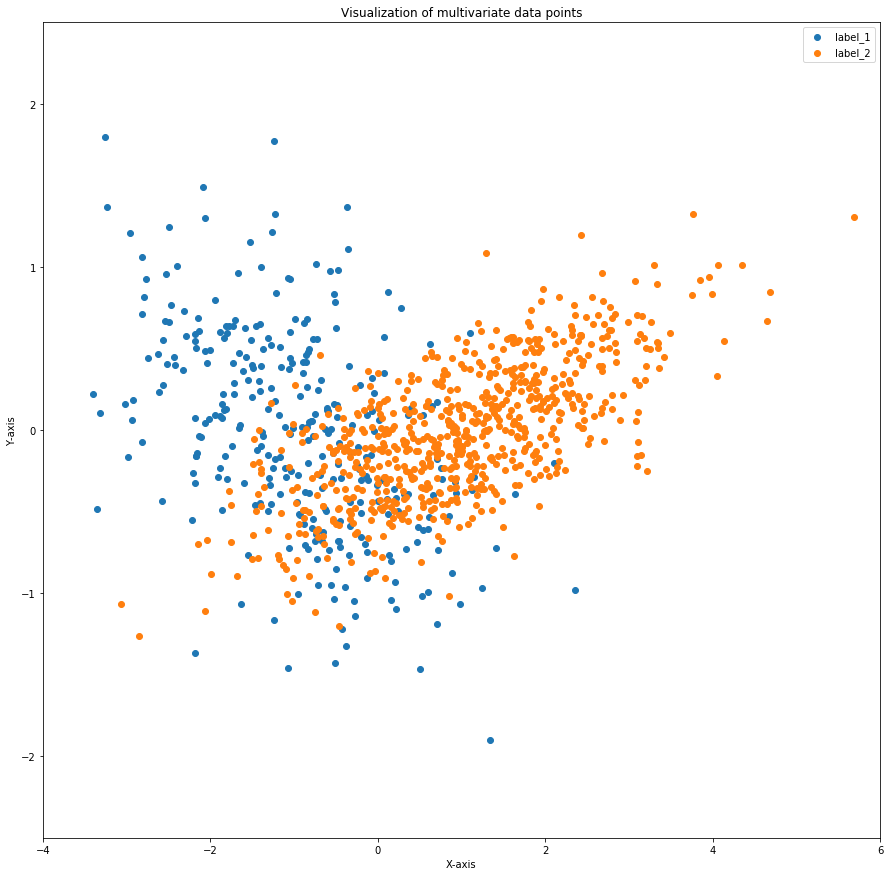

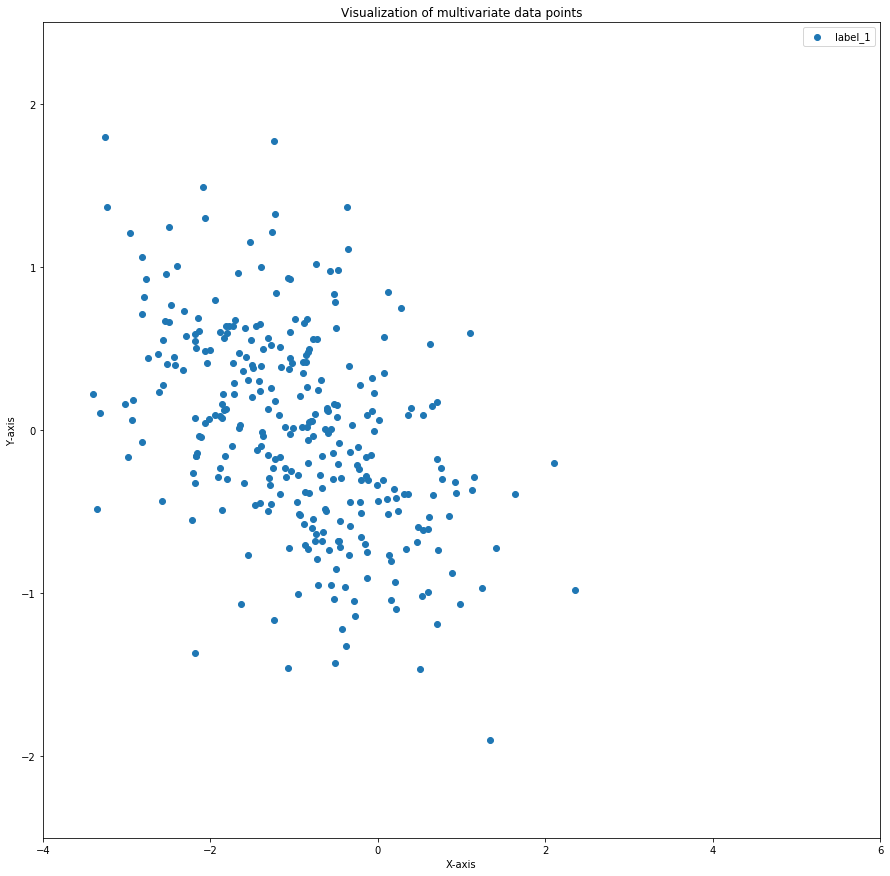

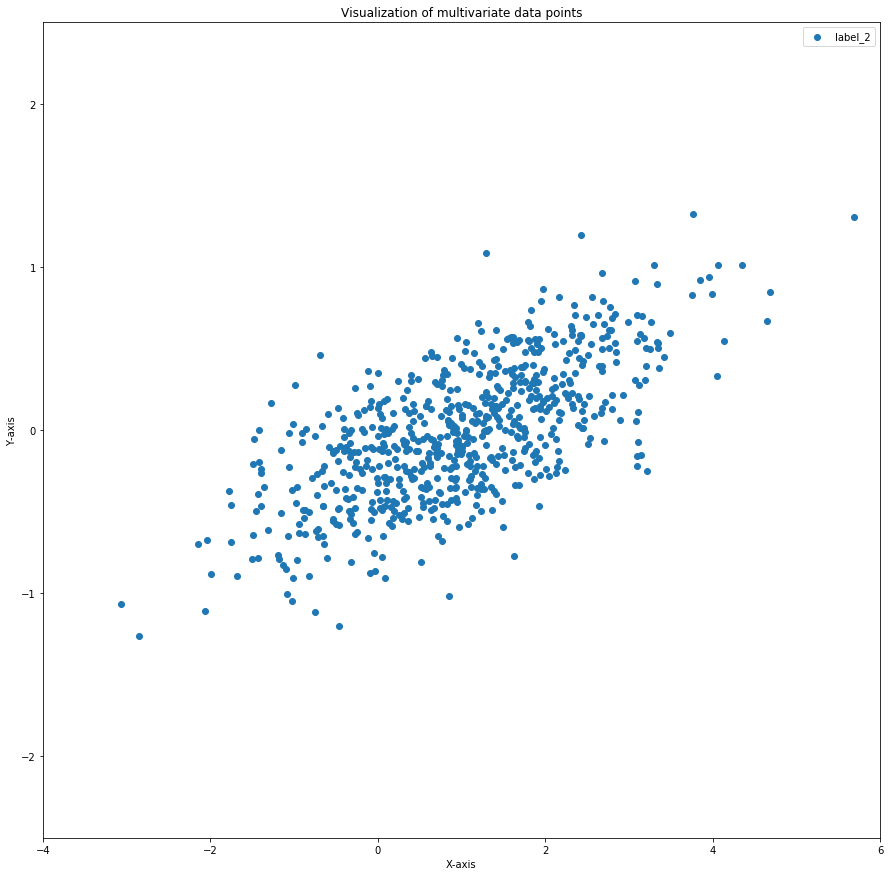

In [0]:
viz_data_points(o1.T,o2.T)
viz_data_points_single(o1.T,1)
viz_data_points_single(o2.T,2)

In [0]:
mean1=np.array(mean1).reshape(2,1)
mean2=np.array(mean2).reshape(2,1)

In [0]:
W1=(-0.5)*inv(cov1) # calculating the various generator functions to classify them into the various classes
W2=(-0.5)*inv(cov2)


w1=inv(cov1)@mean1
w2=inv(cov2)@mean2


w10=-(mean1.T@inv(cov1)@mean1/2)- np.log(det(cov1))/2 + np.log(p_w1)
w20=-(mean2.T@inv(cov2)@mean2/2)- np.log(det(cov2))/2 + np.log(p_w2)


g1_1=np.diag(o1@W1@o1.T) + (w1.T@o1.T) + w10
g1_2=np.diag(o1@W2@o1.T) + (w2.T@o1.T) + w20


g2_1=np.diag(o2@W1@o2.T) + (w1.T@o2.T) + w10
g2_2=np.diag(o2@W2@o2.T) + (w2.T@o2.T) + w20


In [0]:
ww1=pd.DataFrame(data=o1,columns=['d1','d2'])
ww1['Real_Label']=np.ones(n1)*1
ww2=pd.DataFrame(data=o2,columns=['d1','d2'])
ww2['Real_Label']=np.ones(n2)*2

In [0]:

n1_1=ww1[((g1_1>g1_2)).reshape(-1,1)]
n1_2=ww1[((g1_2>g1_1)).reshape(-1,1)]

n2_1=ww2[((g2_1>g2_2)).reshape(-1,1)]
n2_2=ww2[((g2_2>g2_1)).reshape(-1,1)]

In [0]:
d=list([len(n1_1),len(n1_2),len(n2_1),len(n2_2)])
d=np.array(d).reshape(2,2)

confu=pd.DataFrame(data=d,columns=['Predicted Label 1','Predicted Label 2'],index=['Real Label 1','Real Label 2'])

In [0]:
confu

,Predicted Label 1,Predicted Label 2
Real Label 1,207,103
Real Label 2,36,653


In [0]:


print("Sample size for class 1 is {} sample size for class 2 is {} ".format(n1,n2))
print('The number of labels in class 1 classified as label 1 are {} , as label 2 are {} '.format(len(n1_1),len(n1_2))) 
print('The number of labels in class 2 classified as label 1 are {} , as label 2 are {} '.format(len(n2_1),len(n2_2))) 
 
error=(len(n1_2)+len(n2_1))

print("Total Error {}".format(error))
print("accuracy is {}".format((999-error)/999))
print("Total estimated probability of  Error is {}".format(error/999))

Sample size for class 1 is 310 sample size for class 2 is 689 
The number of labels in class 1 classified as label 1 are 207 , as label 2 are 103 
The number of labels in class 2 classified as label 1 are 36 , as label 2 are 653 
Total Error 139
accuracy is 0.8608608608608609
Total estimated probability of  Error is 0.13913913913913914


In [0]:
w=ww1.append(ww2)
X=w.iloc[:,:2].copy()
y=w['Real_Label'].copy()
Xa, Xb = X.iloc[:, 0], X.iloc[:, 1]
xx, yy = make_meshgrid(Xa, Xb)
new=np.c_[xx.ravel(), yy.ravel()]

In [0]:
pl1_1=(np.diag(new@W1@new.T) + (w1.T@new.T) + w10).reshape(-1,1)
pl1_2=(np.diag(new@W2@new.T) + (w2.T@new.T) + w20).reshape(-1,1)

a=[]
for i in range(len(pl1_1)):
  if( (pl1_1[i]>pl1_2[i])):
    a.append(1)
    
  
    
  else:
    a.append(2)

a=(np.array(a)).reshape(xx.shape)

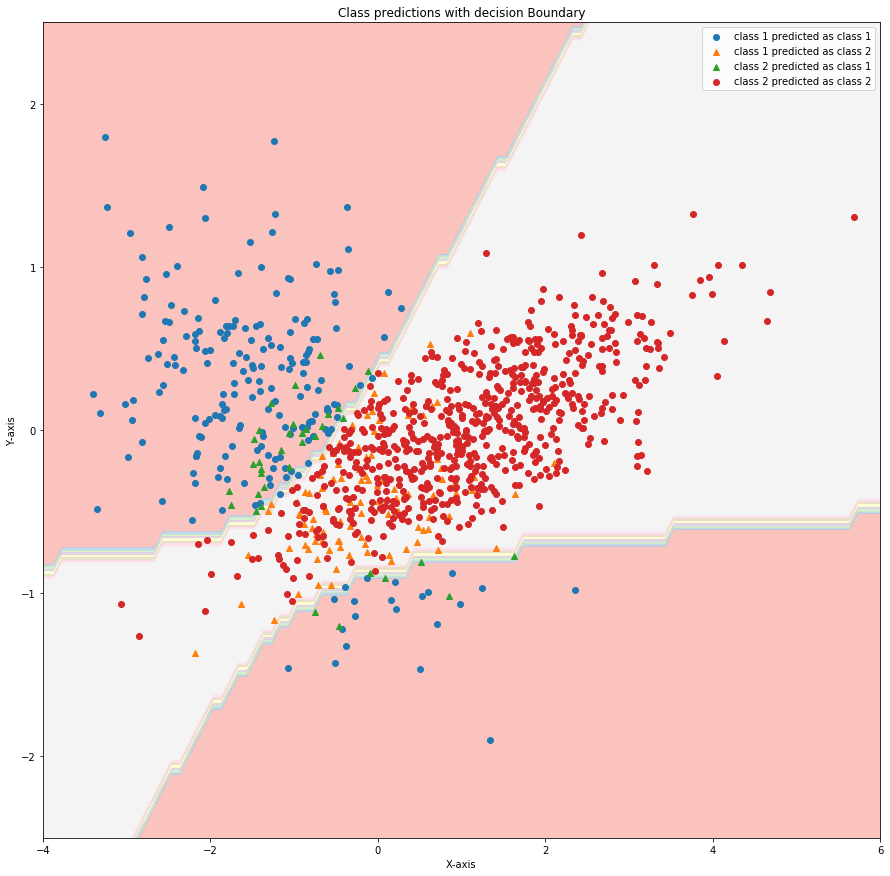

In [0]:
Decision_Boundary1(n1_1,n1_2,n2_1,n2_2,xx,yy,a)

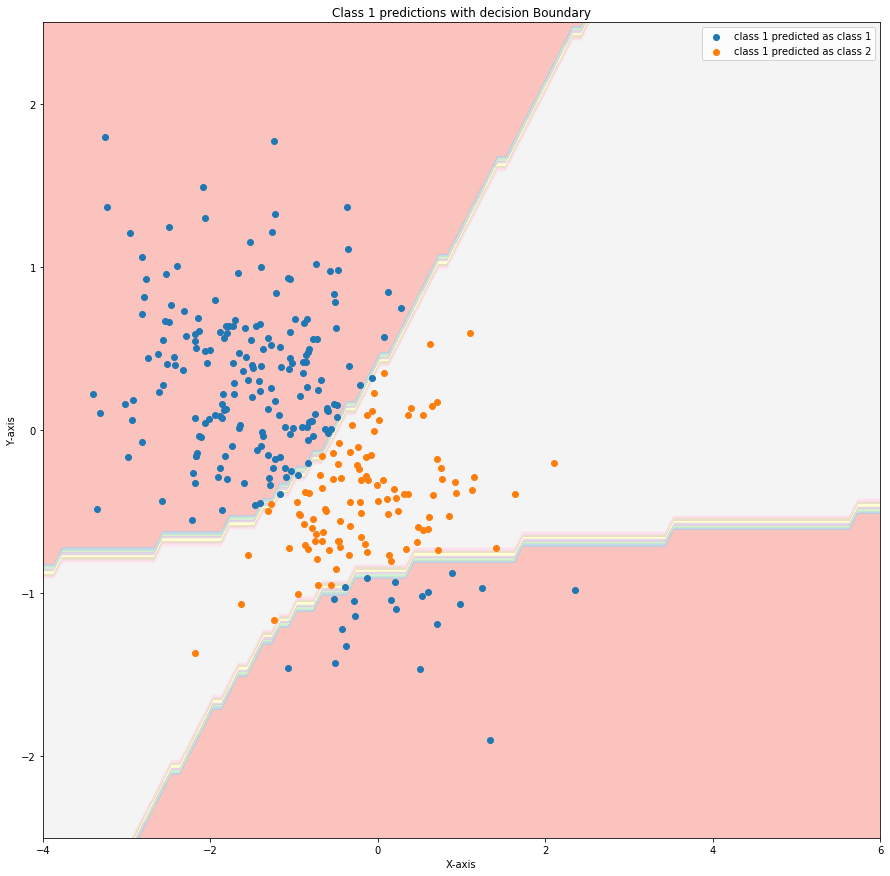

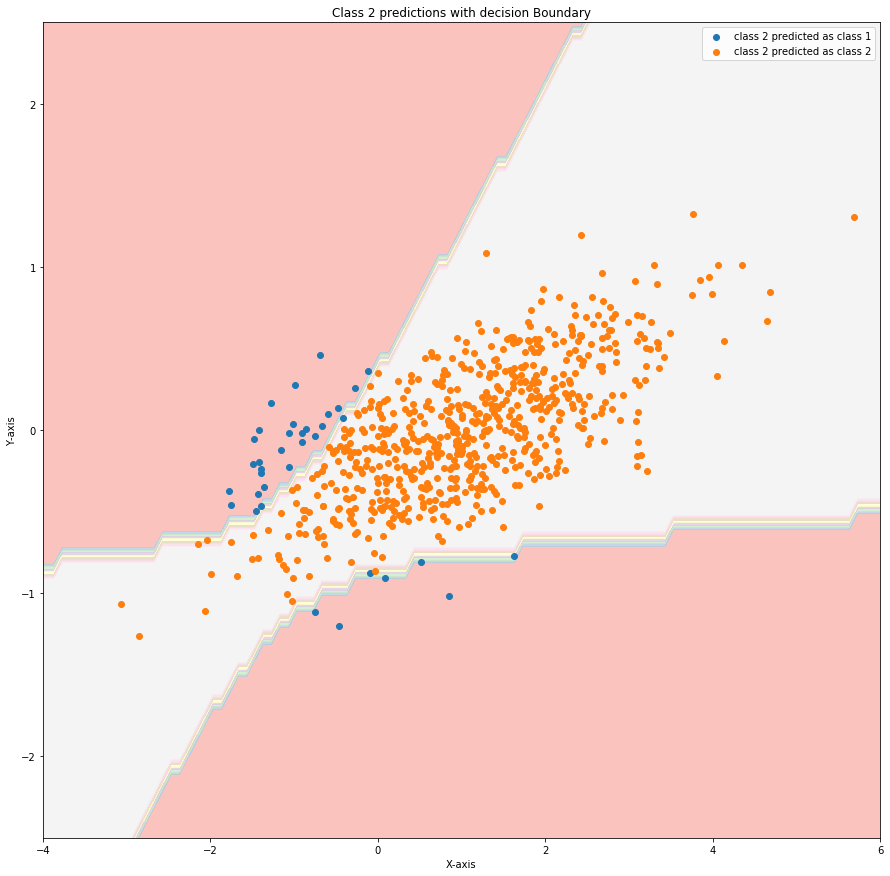

In [0]:
Single_class_boundary1(n1_1,n1_2,xx,yy,a,1)
Single_class_boundary1(n2_1,n2_2,xx,yy,a,2)

LDA


In [0]:
def LDA(o1,o2,m1,m2,p_w1,p_w2):
  S_W=(ecov(o1.T)*p_w1)+(ecov(o2.T)*p_w2)
  #print("value of within class scatter is {}".format(S_W))
  S_B=(m1.reshape(-1,1)-m2.reshape(-1,1))@(m1.reshape(-1,1)-m2.reshape(-1,1)).T
  #print("valu of between class scatter matric is {}".format(S_B))


  eig_vals, eig_vecs=np.linalg.eig(inv(S_W)@S_B)
  #print(eig_vals)
  #print(eig_vecs)
  if(eig_vals[0]>eig_vals[1]):
    wq=eig_vecs[:,0]
  else:
    wq=eig_vecs[:,1]
  #print(wq.shape)
  x1=wq.T@o1
  x2=wq.T@o2
  return(x1,x2)

In [0]:
o1=o1.reshape(2,-1)
o2=o2.reshape(2,-1)
m1=o1.mean(axis=1).reshape(2,1)
m2=o2.mean(axis=1).reshape(2,1)


In [0]:
x1,x2=LDA(o1,o2,m1,m2,p_w1,p_w2)

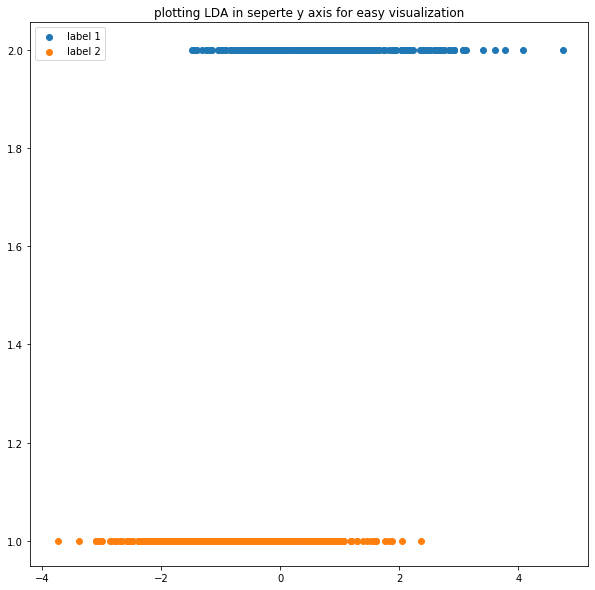

In [0]:
lda_simple(x1,x2,n1,n2)

In [0]:
def min_prob_error(x1,x2):  
  xmin=x1.min() if x1.min()<x2.min() else x2.min()
  xmax=x1.max() if x1.max()>x2.max() else x2.max()
  x1=np.array(x1)
  x2=np.array(x2)
  thresh=np.linspace(xmin,xmax,1000) # various x values to look for the best threshold
  error=[]
  if (x1.max()>x2.max()):
    for i in thresh:
      l1_1=x1[x1>=i]
      l1_2=x1[x1<i]
      l2_2=x2[x2<=i]
      l2_1=x2[x2>i]
      error.append((len(l1_2)+len(l2_1))/999)
  else:
    for i in thresh:
      l1_1=x1[x1<=i]
      l1_2=x1[x1>i]
      l2_2=x2[x2>=i]
      l2_1=x2[x2<i]
      error.append((len(l1_2)+len(l2_1))/999)

  plt.figure(figsize=(10,10))
  plt.plot(thresh,error)
  plt.xlabel('New axis values')
  plt.ylabel('Error values')

  min_err=thresh[np.argmin(np.array(error))]
  min_err_point=thresh[np.argmin(np.array(error))]
  min_error=np.min(np.array(error))
  
  print("The minimum error is {} and the point of occurence is {}".format( min_error,min_err_point))

  if (x1.max()>x2.max()):
    l1_1=x1[x1>=min_err_point]
    l1_2=x1[x1<min_err_point]
    l2_2=x2[x2<=min_err_point]
    l2_1=x2[x2>min_err_point]
  else:
    l1_1=x1[x1<=min_err_point]
    l1_2=x1[x1>min_err_point]
    l2_2=x2[x2>=min_err_point]
    l2_1=x2[x2<min_err_point]

  print("The accuracy is {}".format((len(l1_1)+len(l2_2))/999))
  return(l1_1,l1_2,l2_2,l2_1,min_err_point)


The minimum error is 0.2222222222222222 and the point of occurence is 0.9325101151631392
The accuracy is 0.7777777777777778


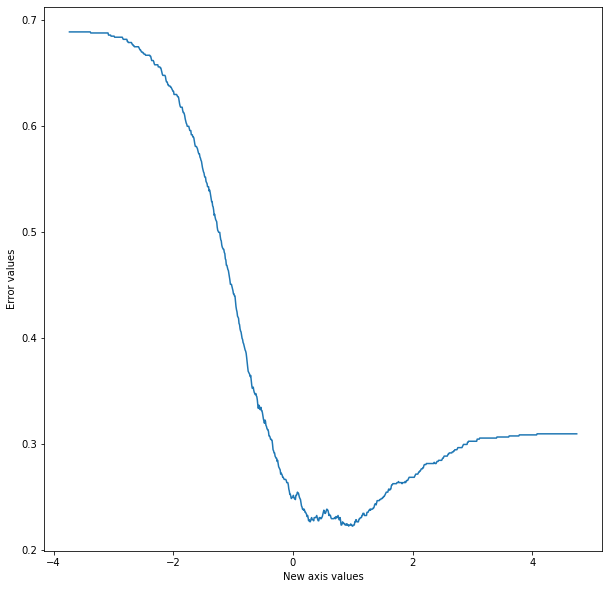

In [0]:
l1_1,l1_2,l2_2,l2_1,min_err_point=min_prob_error(x1,x2)

Sample size for class 1 is 310 sample size for class 2 is 689
The number of labels in class 1 classified as label 1 are 114 and as label 2 are 196
The number of labels in class 2 classified as label 2 are 663 and as label 1 are 26
Total Error 0.2222222222222222
Total Accuracy is 0.7777777777777778


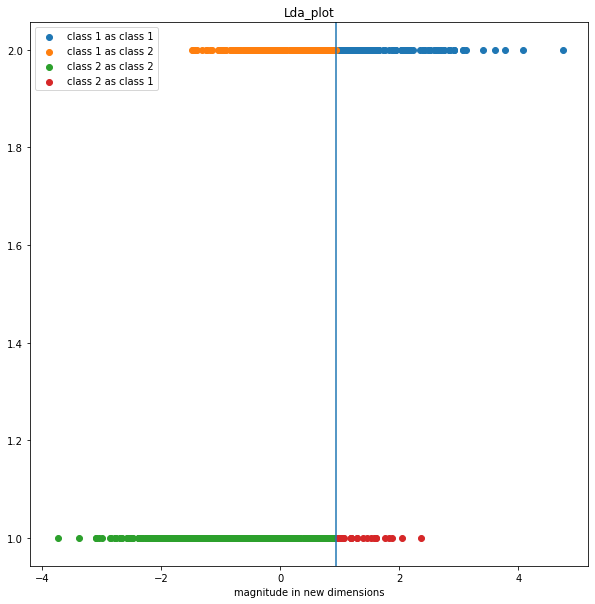

In [0]:
lda_plot(l1_1,l1_2,l2_2,l2_1,min_err_point)
print("Sample size for class 1 is {} sample size for class 2 is {}".format(n1,n2))
print('The number of labels in class 1 classified as label 1 are {} and as label 2 are {}'.format(len(l1_1),len(l1_2))) 
print('The number of labels in class 2 classified as label 2 are {} and as label 1 are {}'.format(len(l2_2),len(l2_1))) 
print("Total Error {}".format((len(l1_2)+len(l2_1))/999))
print("Total Accuracy is {}".format((len(l1_1)+len(l2_2))/999))

Logistic Regression

In [0]:
def Check_accuracy(X,theta1,Y):
  z= theta1.T@X                    #dot product of theta1 and x_train to calculate the sigmoid function    
  sigma = 1/(1+np.exp(z))
  check=sigma>=0.5
  check=list(check[0])
  check1=[not i for i in check]
  bool_val = list(map(int, check1))
  #print("Accuracy is {}".format(np.mean(bool_val==Y)))
  return(np.mean(bool_val==Y))

def pred_values(X,theta1): 
  z= theta1.T@X                    #dot product of theta1 and x_train to calculate the sigmoid function    
  sigma = 1/(1+np.exp(z))
  check=sigma>=0.5
  check=list(check[0])
  check1=[not i for i in check]
  bool_val = list(map(int, check1))
  return(bool_val)


In [0]:
num_iterations = [2000,4000,6000,8000,10000]
lr_list = [0.00004,0.0001,0.0002,0.0003,0.0004,0.0005,0.0006,0.0007,0.0008,0.001,0.01,0.1]

Text(0.5, 0, 'Iteration Count')

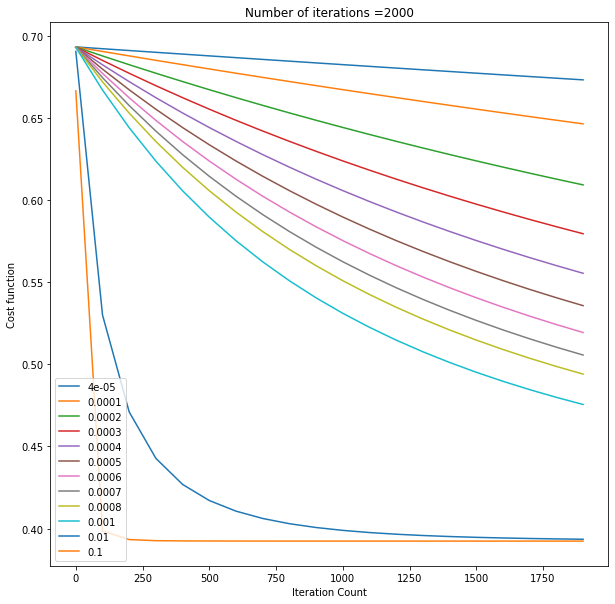

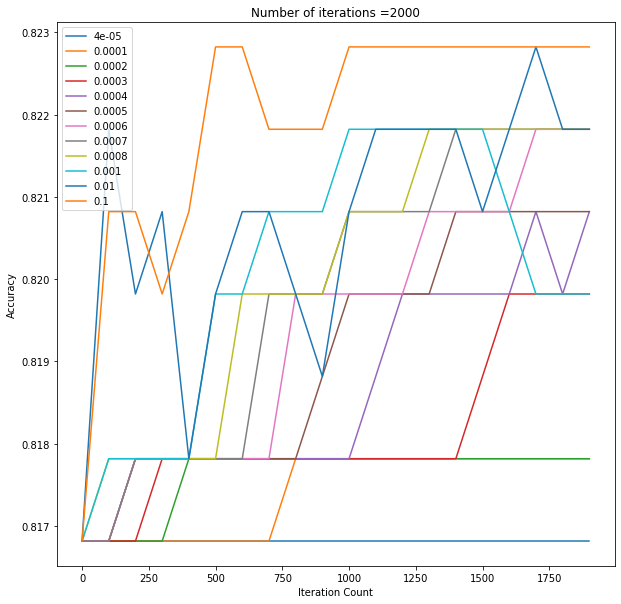

In [0]:
accuracy_main=[]
loss_main=[]
for i in lr_list:
  X=w.iloc[:,:2].values
  y=w["Real_Label"].values
  Y = np.array(list(map(lambda x: x-1, y)))
  lr=i
  theta1 = np.zeros((len(np.transpose(X))+1,1))
  o=np.ones(((len(X),1))) 
  X=np.concatenate((o,X),axis=1) 
  X=X.T
  m=Y.shape[0]
  accu_plot=[]
  loss_plot=[]
  num_iteration=num_iterations[0]
  for i in range(num_iteration):

    z= theta1.T@X                    #dot product of theta1 and x_train to calculate the sigmoid function
      
    sigma = 1/(1+np.exp(-z))    #h theta x                    # getting the sigmoid function  I am using -z not z as given
    # print(sigma)
    
    grad_des = X@(sigma-Y).T/m  # Get the partial differentiation of the cost function for all the m samples with respect to theta 
    
    theta1-=lr*grad_des 

    if( i % 100 ==0):                             
        z= theta1.T@X 
        sigma = 1/(1+np.exp(-z))
        loss = ((-Y * np.log(sigma)) - ((1 - Y) * np.log(1 -sigma))).mean()    #Calculating the loss for every 2000 iterations so as to plot a graph for 5 set of values
        loss_plot.append(loss)
        accu_plot.append(Check_accuracy(X,theta1,Y)) 
   
  loss_main.append(np.array(loss_plot))
  accuracy_main.append(accu_plot)



loss_main=np.array(loss_main)

loss_main=np.array(loss_main)
zz=[i*100 for i in range(loss_main.shape[1])]
plt.figure(figsize=(10,10))
for i,j in enumerate(lr_list):
  plt.plot(zz,loss_main[i,:],label=lr_list[i])
plt.legend()
plt.title("Number of iterations ={}".format(num_iteration))
plt.ylabel("Cost function")
plt.xlabel("Iteration Count")
accuracy_main=np.array(accuracy_main)
plt.figure(figsize=(10,10))
for i,j in enumerate(lr_list):
  plt.plot(zz,accuracy_main[i,:],label=lr_list[i])
plt.legend()
plt.title("Number of iterations ={}".format(num_iteration))
plt.ylabel("Accuracy")
plt.xlabel("Iteration Count")

Text(0.5, 0, 'Iteration Count')

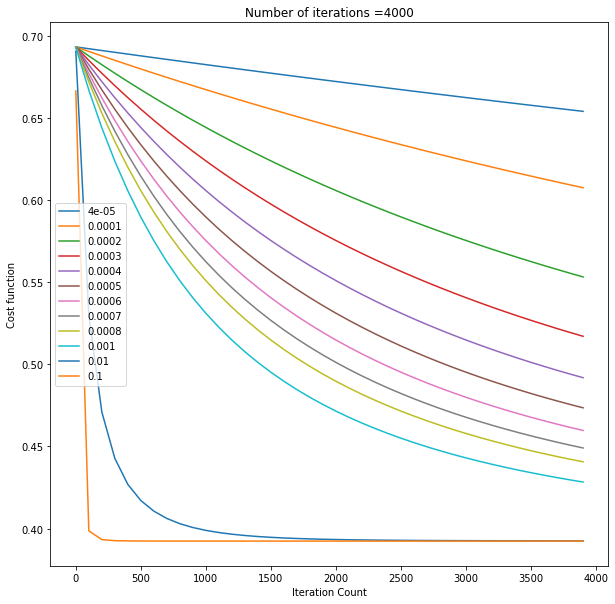

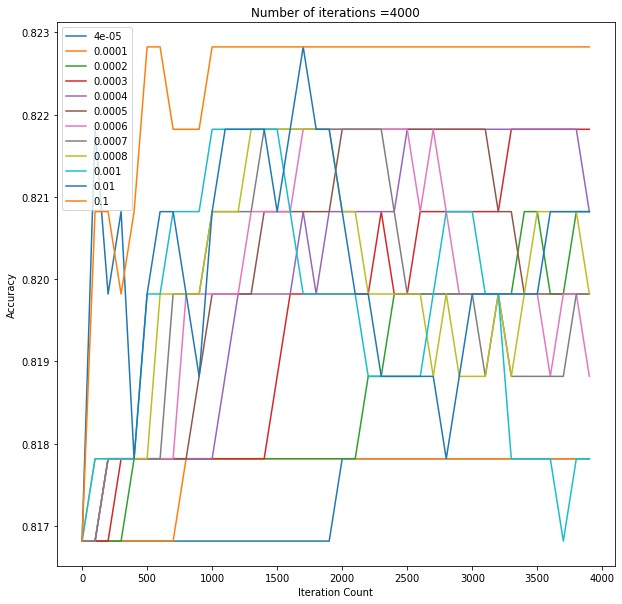

In [0]:
accuracy_main=[]
loss_main=[]
for i in lr_list:
  X=w.iloc[:,:2].values
  y=w["Real_Label"].values
  Y = np.array(list(map(lambda x: x-1, y)))
  lr=i
  theta1 = np.zeros((len(np.transpose(X))+1,1))
  o=np.ones(((len(X),1))) 
  X=np.concatenate((o,X),axis=1) 
  X=X.T
  m=Y.shape[0]
  accu_plot=[]
  loss_plot=[]
  num_iteration=num_iterations[1]
  for i in range(num_iteration):

    z= theta1.T@X                    #dot product of theta1 and x_train to calculate the sigmoid function
      
    sigma = 1/(1+np.exp(-z))    #h theta x                    # getting the sigmoid function  I am using -z not z as given
    # print(sigma)
    
    grad_des = X@(sigma-Y).T/m  # Get the partial differentiation of the cost function for all the m samples with respect to theta 
    
    theta1-=lr*grad_des 

    if( i % 100 ==0):                             
        z= theta1.T@X 
        sigma = 1/(1+np.exp(-z))
        loss = ((-Y * np.log(sigma)) - ((1 - Y) * np.log(1 -sigma))).mean()    #Calculating the loss for every 2000 iterations so as to plot a graph for 5 set of values
        loss_plot.append(loss)
        accu_plot.append(Check_accuracy(X,theta1,Y)) 
   
  loss_main.append(np.array(loss_plot))
  accuracy_main.append(accu_plot)



loss_main=np.array(loss_main)

loss_main=np.array(loss_main)
zz=[i*100 for i in range(loss_main.shape[1])]
plt.figure(figsize=(10,10))
for i,j in enumerate(lr_list):
  plt.plot(zz,loss_main[i,:],label=lr_list[i])
plt.legend()
plt.title("Number of iterations ={}".format(num_iteration))
plt.ylabel("Cost function")
plt.xlabel("Iteration Count")
accuracy_main=np.array(accuracy_main)
plt.figure(figsize=(10,10))
for i,j in enumerate(lr_list):
  plt.plot(zz,accuracy_main[i,:],label=lr_list[i])
plt.legend()
plt.title("Number of iterations ={}".format(num_iteration))
plt.ylabel("Accuracy")
plt.xlabel("Iteration Count")

Text(0.5, 0, 'Iteration Count')

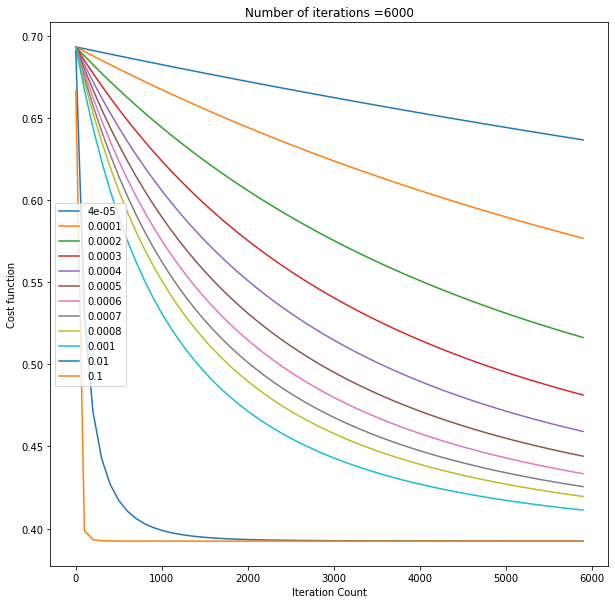

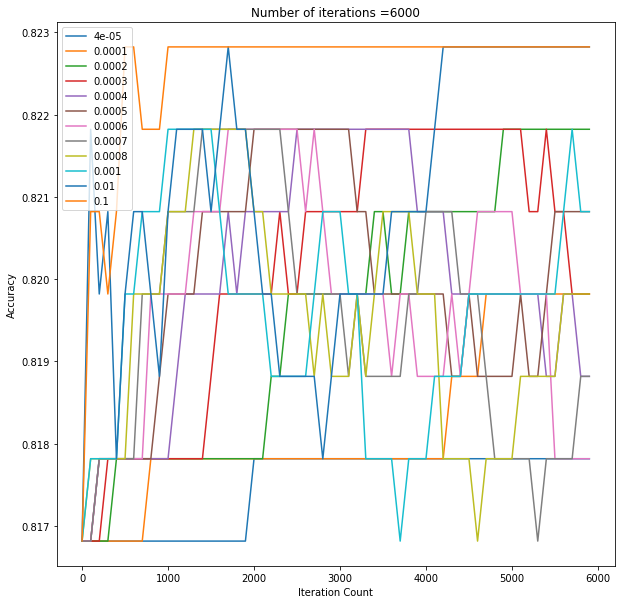

In [0]:
accuracy_main=[]
loss_main=[]
for i in lr_list:
  X=w.iloc[:,:2].values
  y=w["Real_Label"].values
  Y = np.array(list(map(lambda x: x-1, y)))
  lr=i
  theta1 = np.zeros((len(np.transpose(X))+1,1))
  o=np.ones(((len(X),1))) 
  X=np.concatenate((o,X),axis=1) 
  X=X.T
  m=Y.shape[0]
  accu_plot=[]
  loss_plot=[]
  num_iteration=num_iterations[2]
  for i in range(num_iteration):

    z= theta1.T@X                    #dot product of theta1 and x_train to calculate the sigmoid function
      
    sigma = 1/(1+np.exp(-z))    #h theta x                    # getting the sigmoid function  I am using -z not z as given
    # print(sigma)
    
    grad_des = X@(sigma-Y).T/m  # Get the partial differentiation of the cost function for all the m samples with respect to theta 
    
    theta1-=lr*grad_des 

    if( i % 100 ==0):                             
        z= theta1.T@X 
        sigma = 1/(1+np.exp(-z))
        loss = ((-Y * np.log(sigma)) - ((1 - Y) * np.log(1 -sigma))).mean()    #Calculating the loss for every 2000 iterations so as to plot a graph for 5 set of values
        loss_plot.append(loss)
        accu_plot.append(Check_accuracy(X,theta1,Y)) 
   
  loss_main.append(np.array(loss_plot))
  accuracy_main.append(accu_plot)



loss_main=np.array(loss_main)

loss_main=np.array(loss_main)
zz=[i*100 for i in range(loss_main.shape[1])]
plt.figure(figsize=(10,10))
for i,j in enumerate(lr_list):
  plt.plot(zz,loss_main[i,:],label=lr_list[i])
plt.legend()
plt.title("Number of iterations ={}".format(num_iteration))
plt.ylabel("Cost function")
plt.xlabel("Iteration Count")
accuracy_main=np.array(accuracy_main)
plt.figure(figsize=(10,10))
for i,j in enumerate(lr_list):
  plt.plot(zz,accuracy_main[i,:],label=lr_list[i])
plt.legend()
plt.title("Number of iterations ={}".format(num_iteration))
plt.ylabel("Accuracy")
plt.xlabel("Iteration Count")

@ >1000-3000 iterations with say LR equal to 0.1

Text(0.5, 0, 'Iteration Count')

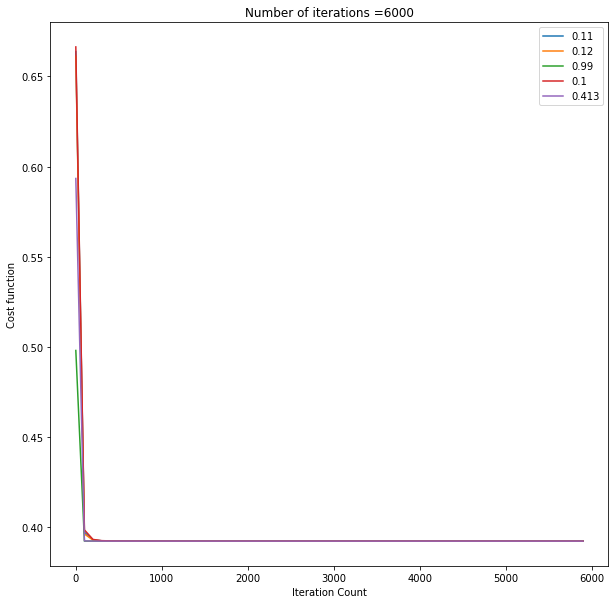

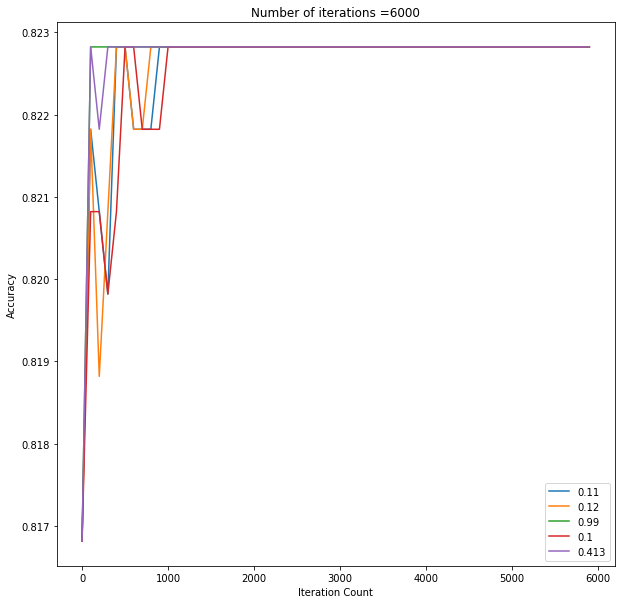

In [0]:

lr_list = [0.11,0.12,0.99,0.1,0.413]
accuracy_main=[]
loss_main=[]
for i in lr_list:
  X=w.iloc[:,:2].values
  y=w["Real_Label"].values
  Y = np.array(list(map(lambda x: x-1, y)))
  lr=i
  theta1 = np.zeros((len(np.transpose(X))+1,1))
  o=np.ones(((len(X),1))) 
  X=np.concatenate((o,X),axis=1) 
  X=X.T
  m=Y.shape[0]
  accu_plot=[]
  loss_plot=[]
  num_iteration=6000
  for i in range(num_iteration):

    z= theta1.T@X                    #dot product of theta1 and x_train to calculate the sigmoid function
      
    sigma = 1/(1+np.exp(-z))    #h theta x                    # getting the sigmoid function  I am using -z not z as given
    # print(sigma)
    
    grad_des = X@(sigma-Y).T/m  # Get the partial differentiation of the cost function for all the m samples with respect to theta 
    
    theta1-=lr*grad_des 

    if( i % 100 ==0):                             
        z= theta1.T@X 
        sigma = 1/(1+np.exp(-z))
        loss = ((-Y * np.log(sigma)) - ((1 - Y) * np.log(1 -sigma))).mean()    #Calculating the loss for every 2000 iterations so as to plot a graph for 5 set of values
        loss_plot.append(loss)
        accu_plot.append(Check_accuracy(X,theta1,Y)) 
   
  loss_main.append(np.array(loss_plot))
  accuracy_main.append(accu_plot)



loss_main=np.array(loss_main)

loss_main=np.array(loss_main)
zz=[i*100 for i in range(loss_main.shape[1])]
plt.figure(figsize=(10,10))
for i,j in enumerate(lr_list):
  plt.plot(zz,loss_main[i,:],label=lr_list[i])
plt.legend()
plt.title("Number of iterations ={}".format(num_iteration))
plt.ylabel("Cost function")
plt.xlabel("Iteration Count")
accuracy_main=np.array(accuracy_main)
plt.figure(figsize=(10,10))
for i,j in enumerate(lr_list):
  plt.plot(zz,accuracy_main[i,:],label=lr_list[i])
plt.legend()
plt.title("Number of iterations ={}".format(num_iteration))
plt.ylabel("Accuracy")
plt.xlabel("Iteration Count")

In [0]:
def Learning_Rate(X):
  e,v=LA.eig((X@np.transpose(X)))
  return(len(X)/np.abs(e.max()))

In [0]:
X=w.iloc[:,:2].values
print(Learning_Rate(X))

0.4131173623012007


Best Learning Rate is about 0.1 at about 2000 iterations

Text(0.5, 0, 'Iteration Count')

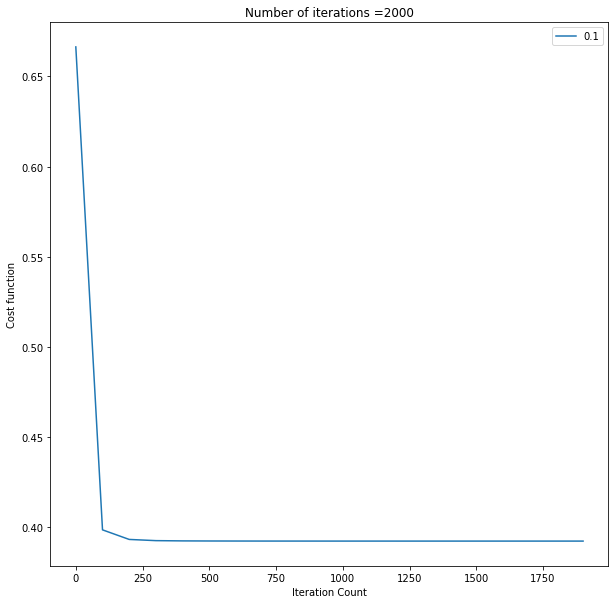

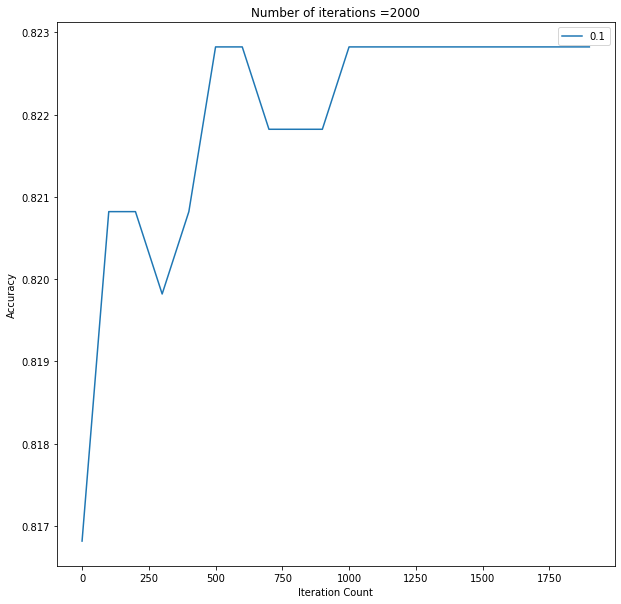

In [0]:
X=w.iloc[:,:2].values
y=w["Real_Label"].values
Y = np.array(list(map(lambda x: x-1, y)))
lr=0.1
theta1 = np.zeros((len(np.transpose(X))+1,1))
o=np.ones(((len(X),1))) 
X=np.concatenate((o,X),axis=1) 
X=X.T
m=Y.shape[0]
accu_plot=[]
loss_plot=[]
num_iteration=2000
for i in range(num_iteration):


  z= theta1.T@X                    #dot product of theta1 and x_train to calculate the sigmoid function
      
  sigma = 1/(1+np.exp(-z))    #h theta x                    # getting the sigmoid function  I am using -z not z as given
    # print(sigma)
    
  grad_des = X@(sigma-Y).T/m  # Get the partial differentiation of the cost function for all the m samples with respect to theta 
    
  theta1-=lr*grad_des 

  if( i % 100 ==0): 

    z= theta1.T@X 
    sigma = 1/(1+np.exp(-z))
    loss = ((-Y * np.log(sigma)) - ((1 - Y) * np.log(1 -sigma))).mean()    #Calculating the loss for every 2000 iterations so as to plot a graph for 5 set of values
    loss_plot.append(loss)
    accu_plot.append(Check_accuracy(X,theta1,Y)) 
   
  





loss_plot=np.array(loss_plot)
zz=[i*100 for i in range(len(loss_plot))]
plt.figure(figsize=(10,10))
plt.plot(zz,loss_plot,label=lr)
plt.legend()
plt.title("Number of iterations ={}".format(num_iteration))
plt.ylabel("Cost function")
plt.xlabel("Iteration Count")
accu_plot=np.array(accu_plot)
plt.figure(figsize=(10,10))
plt.plot(zz,accu_plot,label=lr)
plt.legend()
plt.title("Number of iterations ={}".format(num_iteration))
plt.ylabel("Accuracy")
plt.xlabel("Iteration Count")

In [0]:
y_pred=pred_values(X,theta1)

In [0]:
from sklearn.metrics import classification_report,confusion_matrix
d=confusion_matrix(Y,y_pred)

In [0]:
confu=pd.DataFrame(data=d,columns=['Predicted Label 1','Predicted Label 2'],index=['Real Label 1','Real Label 2'])
print(confu)
print("Accuracy is {}".format(Check_accuracy(X,theta1,Y)))

              Predicted Label 1  Predicted Label 2
Real Label 1                200                110
Real Label 2                 67                622
Accuracy is 0.8228228228228228


In [0]:

oo=np.ones(((len(new),1))) 
XX=np.concatenate((oo,new),axis=1) 
XX=XX.T

In [0]:
yy_pred=pred_values(XX,theta1)

In [0]:
yy_pred=np.array(yy_pred).reshape(xx.shape) # contour values

In [0]:
xx.shape

(65, 127)

In [0]:

w["Real_Label"]=Y
w["Predicted_label"]=y_pred

In [0]:
log1_1=w[(w["Real_Label"]==0) & (w["Real_Label"]==w["Predicted_label"])].iloc[:,:2]
log1_2=w[(w["Real_Label"]==0) & (w["Real_Label"]!=w["Predicted_label"])].iloc[:,:2]
log2_2=w[(w["Real_Label"]==1) & (w["Real_Label"]==w["Predicted_label"])].iloc[:,:2]
log2_1=w[(w["Real_Label"]==1) & (w["Real_Label"]!=w["Predicted_label"])].iloc[:,:2]

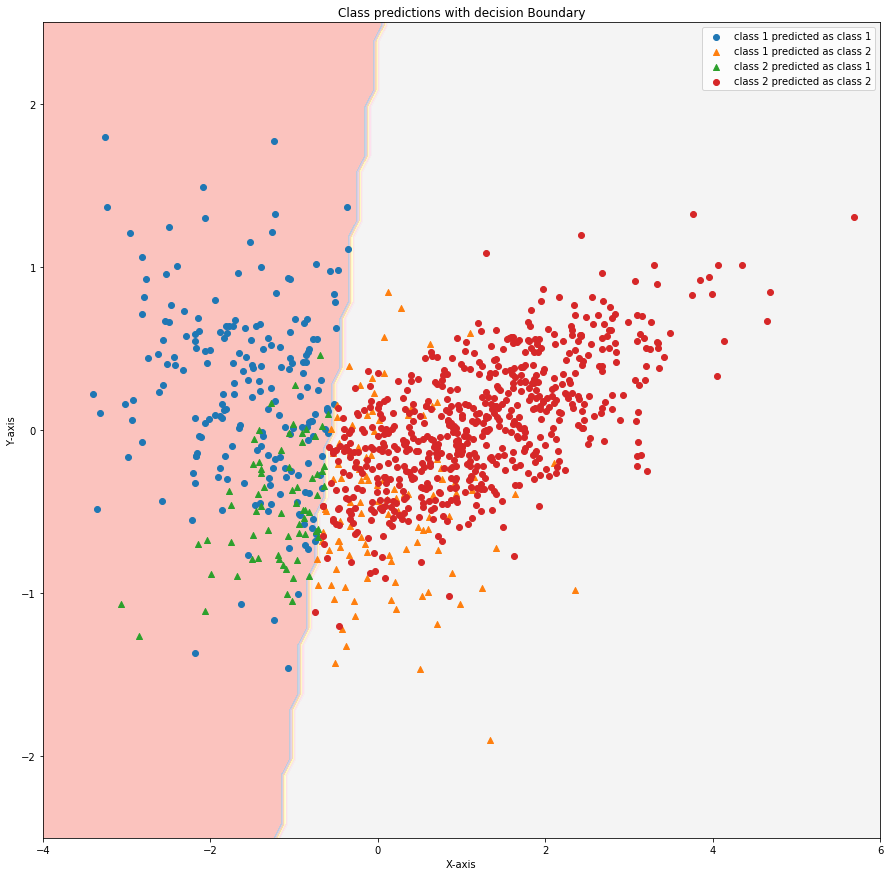

In [0]:
Decision_Boundary1(log1_1,log1_2,log2_1,log2_2,xx,yy,yy_pred)

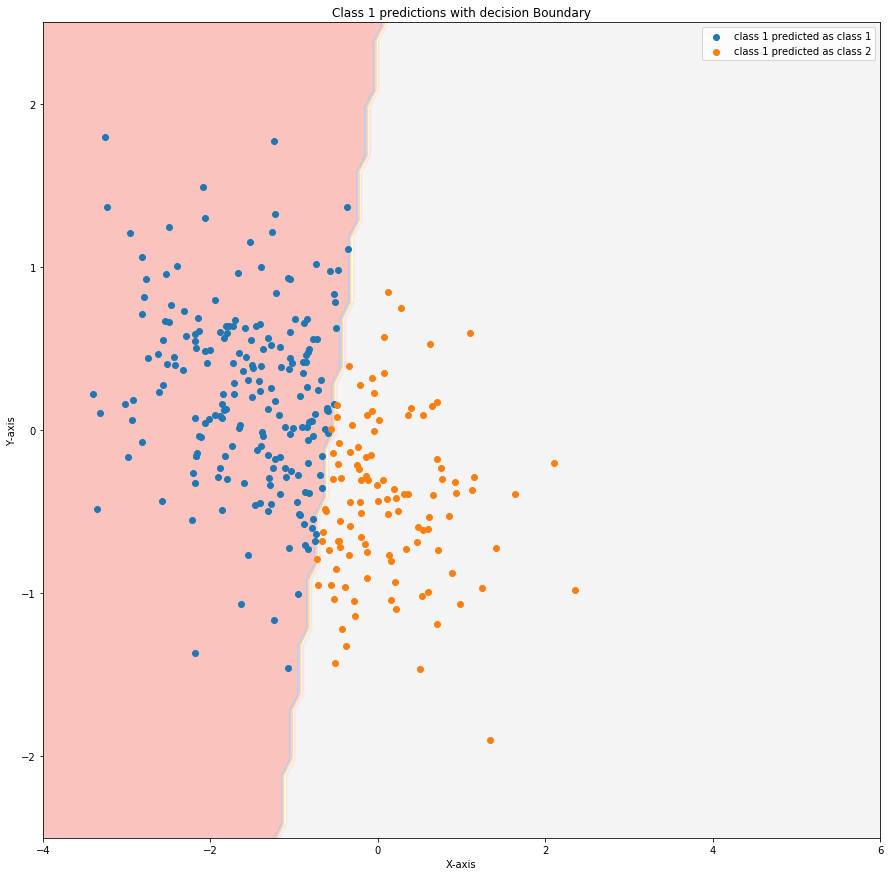

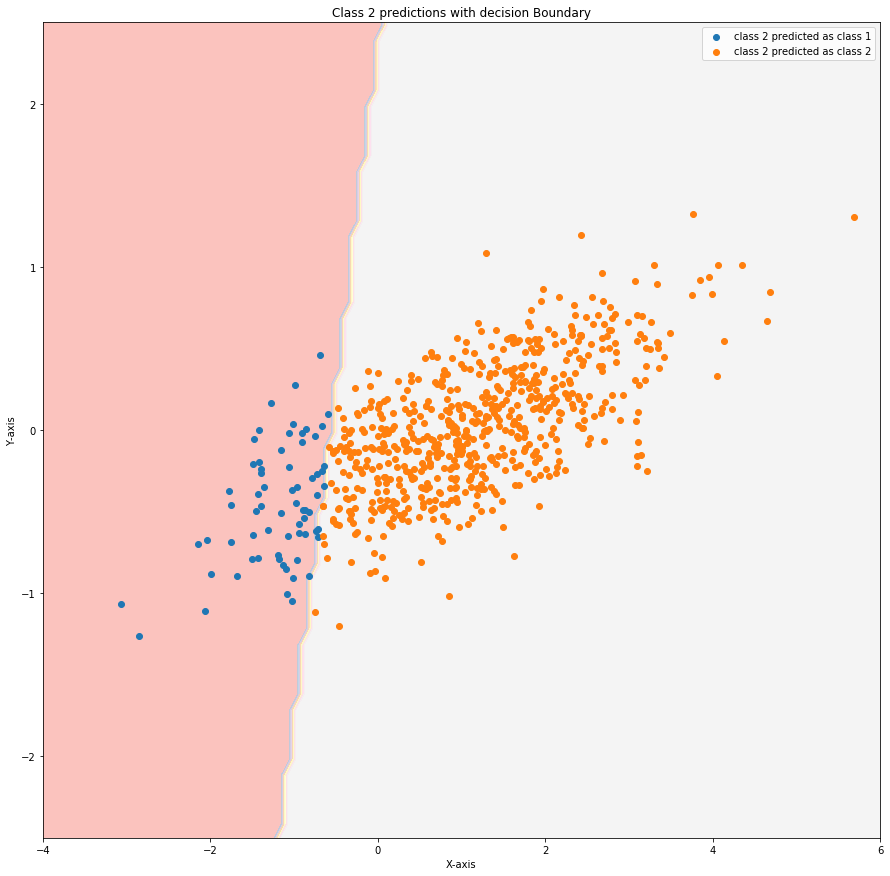

In [0]:
Single_class_boundary1(log1_1,log1_2,xx,yy,yy_pred,1)
Single_class_boundary1(log2_1,log2_2,xx,yy,yy_pred,2)

## Question 2


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from sklearn.datasets import make_spd_matrix # crating positive semidefinite matrix
from numpy.linalg import inv 
from numpy.linalg import det
from sklearn.model_selection import KFold
from sklearn import mixture
#import numpy.random.multivariate_normal as mvr
#np.random.seed(101)
% matplotlib inline

In [0]:
def Prob_calculator2(data_point,mean,cov): # per data point xn
  vv=(data_point-mean).reshape(2,1)
  kk=(np.exp((vv.T @ inv(cov)@ vv)/(-2))/ (2*np.pi*np.sqrt(det(cov))))

  return(kk[0][0])

In [0]:
T_componenets=4
dataset_N=[10,100,1000,10000]

"""T_mean=[]
for i in range(T_componenets):
  T_mean.append(np.random.randint( -5,5,2))"""
T_mean=[[0,0],[-5,-1],[2,-3],[-5,3.5]]

T_cov=[]
for i in range(T_componenets):
  T_cov.append(make_spd_matrix(2))

#T_Mix_prob=np.random.rand(4)
#T_Mix_prob=T_Mix_prob/sum(T_Mix_prob)
T_Mix_prob=[0.09,0.20,0.35,0.36]
cum_prob=np.cumsum(T_Mix_prob)


In [0]:
def GMM_gen(T_mean,T_cov,cum_prob,T_componenets,dataset_N):
  labels=[]
  T_data_points=[]
  for i in dataset_N:
    val=np.random.rand(i)
    label_c=[]
    for j in range(i):
      if(val[j]<cum_prob[0]):
        label_c.append(0)
      elif(val[j]<cum_prob[1]):
        label_c.append(1)
      elif(val[j]<cum_prob[2]):
        label_c.append(2)
      else:
        label_c.append(3)

    points_c=np.vstack(( np.random.multivariate_normal(T_mean[0],T_cov[0],label_c.count(0)),
                        np.random.multivariate_normal(T_mean[1],T_cov[1],label_c.count(1)), 
                        np.random.multivariate_normal(T_mean[2],T_cov[2],label_c.count(2)), 
                        np.random.multivariate_normal(T_mean[3],T_cov[3],label_c.count(3))))
    label_c.sort()
    labels.append(np.array(label_c))
    T_data_points.append(np.array(points_c))

  return(T_data_points,labels)


In [0]:
T_data_points,labels=GMM_gen(T_mean,T_cov,cum_prob,T_componenets,dataset_N)

In [0]:
def plot_points(points,label,size):
  plt.figure(figsize=(10,10))
  sns.scatterplot(points.T[0],points.T[1],hue=label)
  plt.xlabel("Axis 1")
  plt.ylabel("Axis 2")
  plt.title("Number of datapoints = {}".format(size))

In [0]:
def plot_contours(data_points,comp):
  x1min,x1max=data_points.T[0].min(),data_points.T[0].max()
  x2min,x2max=data_points.T[1].min(),data_points.T[1].max()
  xx,yy=np.meshgrid(np.linspace(x1min,x1max,20),np.linspace(x2min,x2max,20))
  x1=xx.ravel()
  x2=yy.ravel()
  pred=[]
  for i in range(comp):
    MU=T_data_points[0].mean(axis=0)
    cov=np.cov(T_data_points[0].T)
    for j in range(len(x1)):
      pred.append(Prob_calculator2(np.array([x1[j],x2[j]]),MU,cov))

  pred=np.array(pred).reshape(xx.shape)
  plt.contour(xx, yy, pred, linewidths=0.5, colors='k')
  plt.scatter(data_points.T[0],data_points.T[1])
  plt.xlabel("Axis 1")
  plt.ylabel("Axis 2")
  #plt.title("Number of datapoints = {}".format(size))

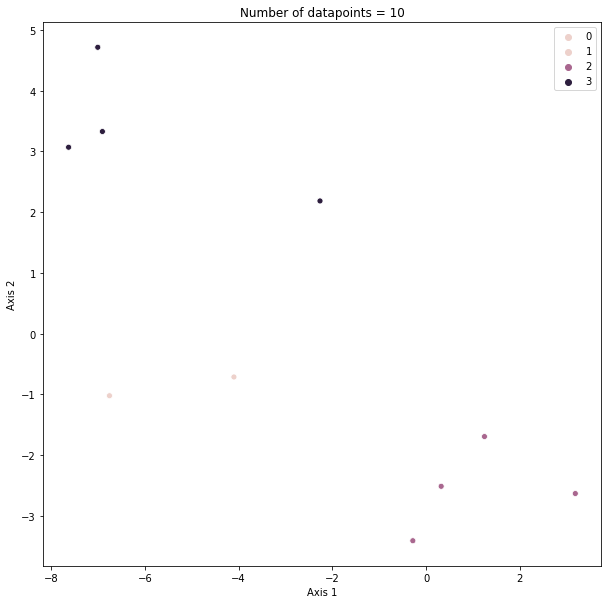

In [0]:
plot_points(T_data_points[0],labels[0],dataset_N[0])



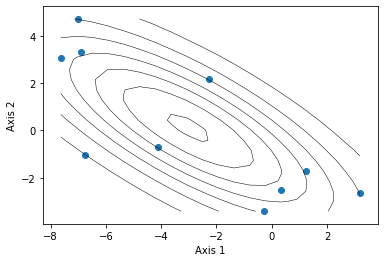

In [0]:
plot_contours(T_data_points[0],1)

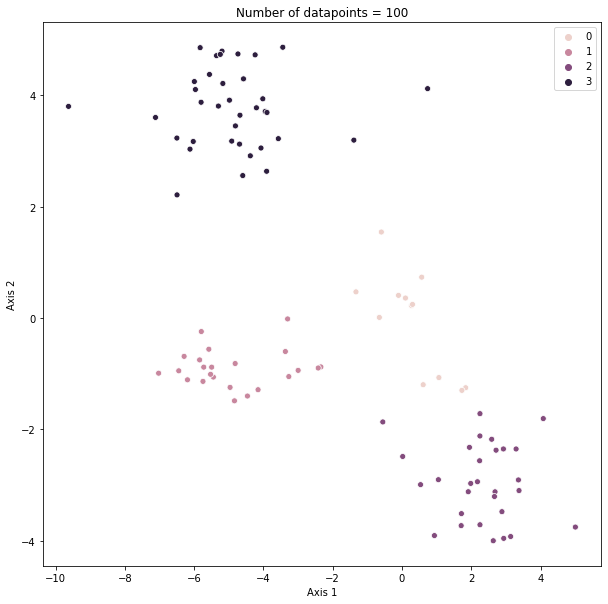

In [0]:
plot_points(T_data_points[1],labels[1],dataset_N[1])

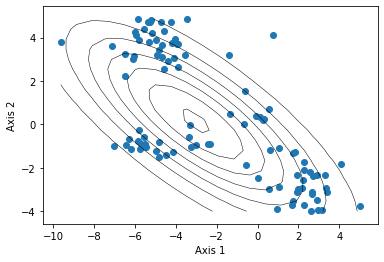

In [0]:

plot_contours(T_data_points[1],1)

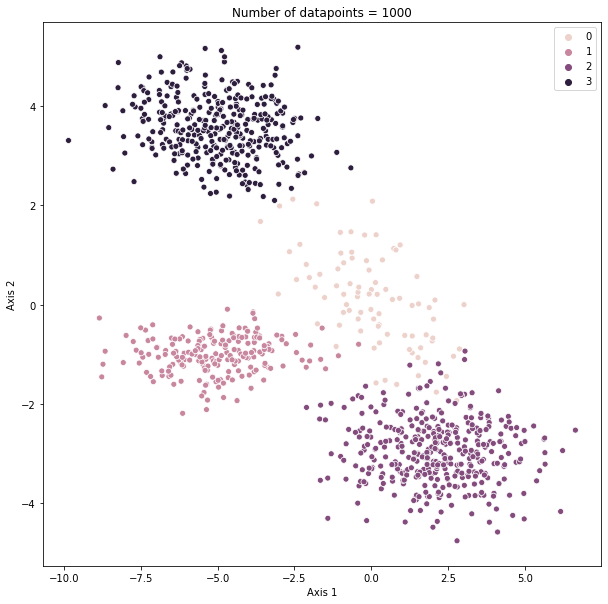

In [0]:
plot_points(T_data_points[2],labels[2],dataset_N[2])


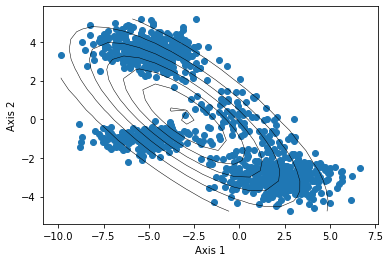

In [0]:
plot_contours(T_data_points[2],1)

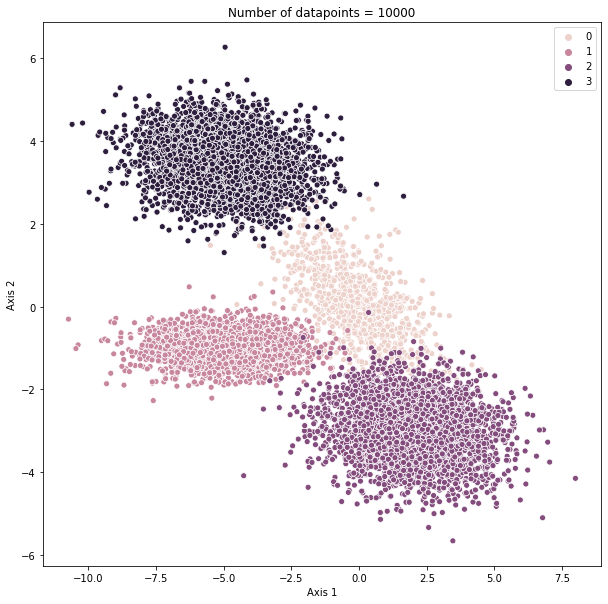

In [0]:
plot_points(T_data_points[3],labels[3],dataset_N[3])

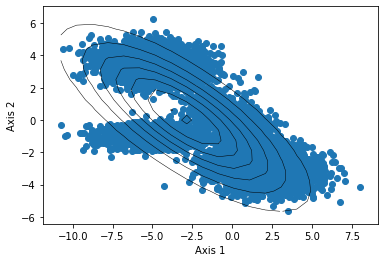

In [0]:
plot_contours(T_data_points[3],1)

In [0]:
delta = .1; 
regWeight = 1e-8

In [0]:
# intialization step based on the number of componenets in this case lets start with 4
# we are going to work with the dataset with 10 points for now
def initializer(data_points,components):

  E_mean=[] # initial mean for the given numer of componenets
  for i in range(components):
    E_mean.append(np.random.randint(-6,6,2)+regWeight)

  E_cov=[]  # initial covariance for the given numer of componenets
  for i in range(components):
    E_cov.append(make_spd_matrix(2)+(np.eye(2)*regWeight))

  E_Mix_prob=np.random.rand(components)
  E_Mix_prob=E_Mix_prob/sum(E_Mix_prob) # # initial probability for the given numer of componenets
  #E_Mix_prob=np.array([1/components]*components)
  return(E_mean,E_cov,E_Mix_prob)


In [0]:
# Denominator calculation for the E step 
def Denominator_calculation1(data_points,E_Mix_prob,components,E_cov,E_mean):
  garb=[]
  for i in range(components):
    garb.append(E_Mix_prob[i]*Prob_calculator(data_points,E_mean[i],E_cov[i]))
  return(np.array(garb).sum(axis=0))

def Denominator_calculation2(data_point,E_Mix_prob,components,E_cov,E_mean): # per data point xn
  oob=0
  for i in range(components):
    oob+=(Prob_calculator2(data_point,E_mean[i],E_cov[i]) * E_Mix_prob[i])
  return(oob)
  



In [0]:
#gamma=Gamma_Calculator(components,M_Mix_prob,M_mean,M_cov,data_points)

In [0]:
# Gamma calulation , then number of gamma depends on the number of components 
def Gamma_Calculator(components,E_Mix_prob,E_mean,E_cov,data_points):
  gamma=[]
  for i in range(components): 
    gamma_c=[] # calcualtes gamma for value for each point x for a particular gamma
    for j in range(len(data_points)):

      num=Prob_calculator2(data_points[j],E_mean[i],E_cov[i])
      #print(num)
      den=Denominator_calculation2(data_points[j],E_Mix_prob,components,E_cov,E_mean)
      #print(den)
      gamma_c.append((E_Mix_prob[i]*num)/den)
    gamma.append(gamma_c)
  return(np.array(gamma))

In [0]:
def Step_M_calculator(components,data_points,gamma,E_mean):
  M_mean=[]
  M_cov=[]
  M_Mix_prob=[]
  for i in range(components): #Represents the look for j
    #M_mean.append(np.multiply(data_points.T,gamma[i]).sum(axis=1)/ gamma[i].sum()) # new mean
    
    mean_num=np.array([0,0]).astype('float')
    cov_num=np.array([[0,0],[0,0]]).astype('float')
    for j in range(len(data_points)): # represents the loop for n
        mean_num +=data_points[j]*gamma[i][j] +regWeight
        ww=(data_points[j]-E_mean[i]).reshape(2,1)
        cov_num += gamma[i][j]*(ww@ww.T) +(np.eye(2)*regWeight) 
    
    M_mean.append(mean_num/gamma[i].sum())
    M_cov.append(cov_num/gamma[i].sum())
    M_Mix_prob.append(np.array(gamma[i].mean()))
  return(M_mean,M_cov,np.array(M_Mix_prob))





In [0]:
def loglikelihood_calculator(gamma):
  rr=[]
  for i in range(gamma.shape[0]):
    rr.append(gamma[i,:]*M_Mix_prob[i])
  
  rr=np.array(rr)
  logli=rr.sum(axis=0)
  logli=np.log(logli).sum()
  return(logli)



In [0]:
components=6
data_points=T_data_points[1]
M_mean,M_cov,M_Mix_prob = initializer(data_points,components) # initialinzing
gamma=Gamma_Calculator(components,M_Mix_prob,M_mean,M_cov,data_points)
loglikelihood=loglikelihood_calculator(gamma)
print("Loglikelihood values = {}".format(loglikelihood))
M_mean,M_cov,M_Mix_prob = Step_M_calculator(components,data_points,gamma,M_mean)
converged=True
while (converged ) :
  
  mu=M_mean
  sigma=M_cov
  ll=loglikelihood
  pi=M_Mix_prob

  check=[np.round(sigma[i].sum(),2) for i in range(components)] 
  if (0 in check):
    print("out1") # covariance matrix reaches singularity
    break
  
  gamma=Gamma_Calculator(components,M_Mix_prob,M_mean,M_cov,data_points)
  loglikelihood=loglikelihood_calculator(gamma)
  print("Loglikelihood values = {}".format(loglikelihood))
  M_mean,M_cov,M_Mix_prob = Step_M_calculator(components,data_points,gamma,M_mean)
  """if(np.sum(np.abs(np.array(mu)-np.array(M_mean)))<= delta or 
   np.sum(np.abs(np.array(sigma)-np.array(M_cov))) <= delta or
   np.sum(np.abs(np.array(pi)-np.array(M_Mix_prob))) <= delta):
    print("out 2")"""
  if(np.abs(loglikelihood-ll)<delta): # need a good stopping criterion
    print("out 2")
    converged=False


Loglikelihood values = -190.58465058750303
Loglikelihood values = -143.496612503848
Loglikelihood values = -144.20807655298148
Loglikelihood values = -145.55321876385497
Loglikelihood values = -146.84898010598624
Loglikelihood values = -149.57636496997074
Loglikelihood values = -151.61836245186174
Loglikelihood values = -153.65504361485446
Loglikelihood values = -153.93398008443575
Loglikelihood values = -154.42878474508552
Loglikelihood values = -155.04815917578009
Loglikelihood values = -155.61847839029926
Loglikelihood values = -156.11880886789953
Loglikelihood values = -156.62557108244303
Loglikelihood values = -157.14850268127276
Loglikelihood values = -157.55478945003765
Loglikelihood values = -157.82872340933596
Loglikelihood values = -158.01884747585237
Loglikelihood values = -158.15791790071995
Loglikelihood values = -158.26595372484104
Loglikelihood values = -158.35454453194544
out 2


In [0]:
dp=T_data_points[1]
y=labels[1]
kf = KFold(n_splits=10)
kf.get_n_splits(dp)
train_score=[]
val_score=[]
for a in range(1,7):
  train_score1=[]
  val_score1=[]
  
  for train_index, test_index in kf.split(dp):
    X_train, X_test = dp[train_index], dp[test_index]
    y_train, y_test = y[train_index], y[test_index]

    components=a # number of componenets
    data_points=X_train
    M_mean,M_cov,M_Mix_prob = initializer(data_points,components) # initialinzing
    gamma=Gamma_Calculator(components,M_Mix_prob,M_mean,M_cov,data_points)
    loglikelihood=loglikelihood_calculator(gamma)
    #print("Loglikelihood values = {}".format(loglikelihood))
    M_mean,M_cov,M_Mix_prob = Step_M_calculator(components,data_points,gamma,M_mean)
    converged=True
    while (converged ) :
      
      mu=M_mean
      sigma=M_cov
      ll=loglikelihood
      pi=M_Mix_prob

      check=[np.round(sigma[i].sum(),1) for i in range(components)] 
      if (0 in check):
        print("out1") # covariance matrix reaches singularity
        break
      
      gamma=Gamma_Calculator(components,M_Mix_prob,M_mean,M_cov,data_points)
      loglikelihood=loglikelihood_calculator(gamma)
      #print("Loglikelihood values = {}".format(loglikelihood))
      M_mean,M_cov,M_Mix_prob = Step_M_calculator(components,data_points,gamma,M_mean)
      
      if(np.abs(loglikelihood-ll)<delta): # need a good stopping criterion
        print("out 2")
        converged=False
      
    train_score1.append(loglikelihood)
    print("training-{}".format(loglikelihood))
    # so far we have trained the model for 1 iteration among 10

    data_points=X_test
    gamma=Gamma_Calculator(components,M_Mix_prob,M_mean,M_cov,data_points)
    loglikelihood=loglikelihood_calculator(gamma)
    val_score1.append(loglikelihood)
    print("validation-{}".format(loglikelihood))
  train_score.append(np.array(train_score1).mean())
  val_score.append(np.array(val_score1).mean())




out 2
training-0.0
validation-0.0
out 2
training-0.0
validation-0.0
out 2
training-0.0
validation-0.0
out 2
training-0.0
validation-0.0
out 2
training-0.0
validation-0.0
out 2
training-0.0
validation-0.0
out 2
training-0.0
validation-0.0
out 2
training-0.0
validation-0.0
out 2
training-0.0
validation-0.0
out 2
training-0.0
validation-0.0
out 2
training--38.16398782848016
validation--1.8797807401798798
out 2
training--62.22776846929232
validation--6.482747298363291
out 2
training--62.31972087380459
validation--6.653570828077211
out 2
training--60.5586885452876
validation--5.10368704863415
out 2
training--38.370494104149124
validation--1.768409181221378
out 2
training--60.553070618666816
validation--5.101544495594554
out 2
training--57.2674401404201
validation--8.213294409390572
out 2
training--54.08102527380515
validation--12.417431573890461
out 2
training--39.51647867237998
validation--1.8610257768140763
out 2
training--54.08581393320234
validation--12.410623910952683
out 2
training--6

In [0]:
dp=T_data_points[2]
dp

array([[ 1.46321512,  1.01629113],
       [-1.43331359, -0.76185401],
       [-0.35430721, -0.67497269],
       ...,
       [-6.04651303,  2.23433915],
       [-7.65439501,  4.71793378],
       [-1.96903851,  2.66815239]])

In [0]:
gmm = mixture.GaussianMixture(n_components=6,
                                      covariance_type="full")
gmm.fit(dp)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=6, n_init=1, precisions_init=None,
                random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

In [0]:
gmm.bic(dp)


8749.67424311621

In [0]:
gmm.means_

array([[ 2.94406369, -2.86952382],
       [-3.9075677 ,  3.27116844],
       [-6.19137641,  3.88018714],
       [ 0.41221761,  0.07128678],
       [-4.89374975, -1.00040422],
       [ 0.91038742, -3.06723709]])

USING GMM Sklearn

In [0]:
from matplotlib.patches import Ellipse

def draw_ellipse(position, covariance, ax=None, **kwargs):
    """Draw an ellipse with a given position and covariance"""
    ax = ax or plt.gca()
    
    # Convert covariance to principal axes
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)
    
    # Draw the Ellipse
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height,
                             angle, **kwargs))
        
def plot_gmm(gmm, X, label=True, ax=None):
    ax = ax or plt.gca()
    labels = gmm.fit(X).predict(X)
    plt.title("Number of samples={}".format(len(X)))
    if label:
        ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2)
    else:
        ax.scatter(X[:, 0], X[:, 1], s=40, zorder=2)
    ax.axis('equal')
    
    w_factor = 0.2 / gmm.weights_.max()
    for pos, covar, w in zip(gmm.means_, gmm.covariances_, gmm.weights_):
        draw_ellipse(pos, covar, alpha=w * w_factor)

In [0]:
def like_plot(train_score,val_score,c):
  pp=np.arange(1,7)
  plt.figure(figsize=(10,10))
  plt.plot(pp,train_score,label="Training score")
  plt.plot(pp,val_score,label="Validation score")
  plt.title("Loglikelihood score vs No. of componenets for dataset with {} samples".format(c))
  plt.xlabel("No. of componenets")
  plt.ylabel("Loglikelihood score")
  plt.legend()

In [0]:
dp=T_data_points[0]
kf = KFold(n_splits=10)
kf.get_n_splits(dp)
train_score=[]
val_score=[]
for a in range(1,7):
  train_score1=[]
  val_score1=[]
  
  for train_index, test_index in kf.split(dp):
    X_train, X_test = dp[train_index], dp[test_index]
    
    gmm = mixture.GaussianMixture(n_components=a,
                                      covariance_type="full")
    gmm.fit(X_train)
    train_score1.append(gmm.score(X_train))
    
    val_score1.append(gmm.score(X_test))

  train_score.append(np.array(train_score1).mean())
  val_score.append(np.array(val_score1).mean())

  

    

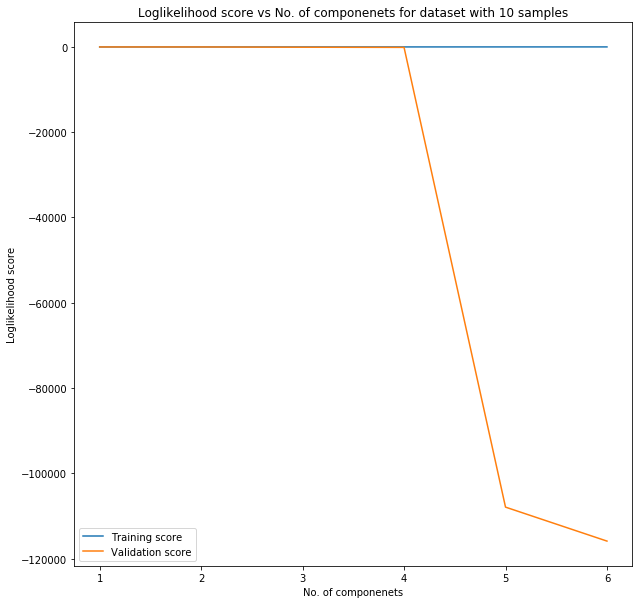

In [0]:
like_plot(train_score,val_score,10)

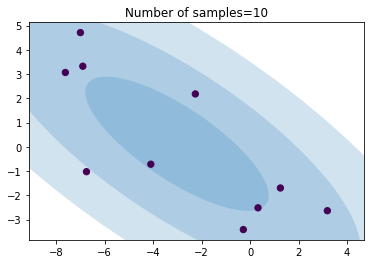

In [0]:
dp=T_data_points[0]
kf = KFold(n_splits=10,shuffle=True)
kf.get_n_splits(dp)
a=1
  
gmm = mixture.GaussianMixture(n_components=a,
                                      covariance_type="full")
gmm.fit(dp)
plot_gmm(gmm,dp)

    

In [0]:
dp=T_data_points[1]
kf = KFold(n_splits=10)
kf.get_n_splits(dp)
train_score=[]
val_score=[]
for a in range(1,7):
  train_score1=[]
  val_score1=[]
  
  for train_index, test_index in kf.split(dp):
    X_train, X_test = dp[train_index], dp[test_index]
    
    gmm = mixture.GaussianMixture(n_components=a,
                                      covariance_type="full")
    gmm.fit(X_train)
    train_score1.append(gmm.score(X_train))
    
    val_score1.append(gmm.score(X_test))

  train_score.append(np.array(train_score1).mean())
  val_score.append(np.array(val_score1).mean())

  

    

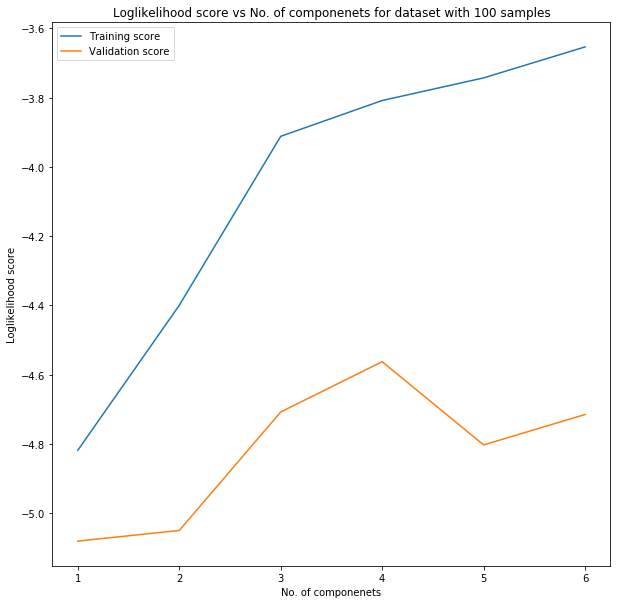

In [0]:
like_plot(train_score,val_score,100)

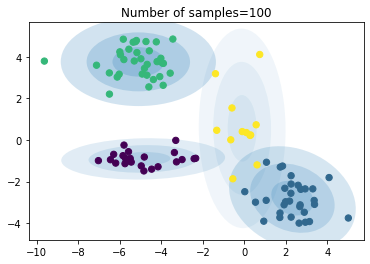

In [0]:
dp=T_data_points[1]
kf = KFold(n_splits=10,shuffle=True)
kf.get_n_splits(dp)
a=4
  
gmm = mixture.GaussianMixture(n_components=a,
                                      covariance_type="full")
gmm.fit(dp)
plot_gmm(gmm,dp)

    

In [0]:
dp=T_data_points[2]
kf = KFold(n_splits=10)
kf.get_n_splits(dp)
train_score=[]
val_score=[]
for a in range(1,7):
  train_score1=[]
  val_score1=[]
  
  for train_index, test_index in kf.split(dp):
    X_train, X_test = dp[train_index], dp[test_index]
    
    gmm = mixture.GaussianMixture(n_components=a,
                                      covariance_type="full")
    gmm.fit(X_train)
    train_score1.append(gmm.score(X_train))
    
    val_score1.append(gmm.score(X_test))

  train_score.append(np.array(train_score1).mean())
  val_score.append(np.array(val_score1).mean())

  

    

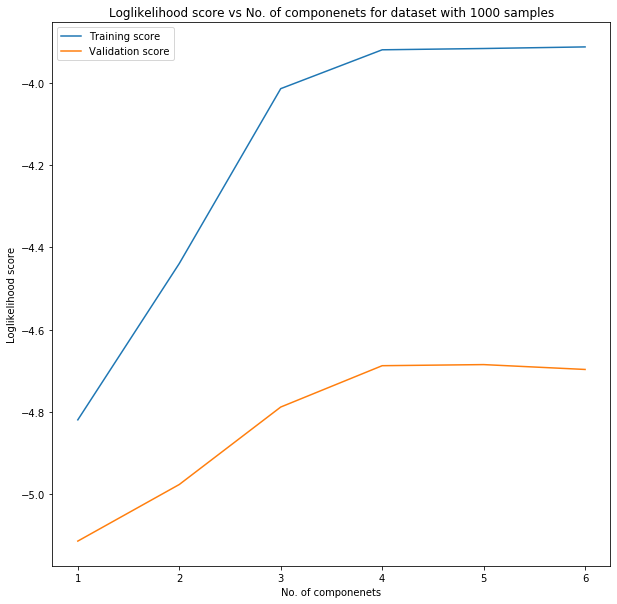

In [0]:
like_plot(train_score,val_score,1000)

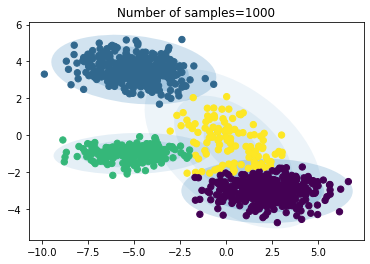

In [0]:
dp=T_data_points[2]
kf = KFold(n_splits=10,shuffle=True)
kf.get_n_splits(dp)
a=4
gmm = mixture.GaussianMixture(n_components=a,
                                      covariance_type="full")
gmm.fit(dp)
plot_gmm(gmm,dp)

    

In [0]:
dp=T_data_points[3]
kf = KFold(n_splits=10)
kf.get_n_splits(dp)
train_score=[]
val_score=[]
for a in range(1,7):
  train_score1=[]
  val_score1=[]
  
  for train_index, test_index in kf.split(dp):
    X_train, X_test = dp[train_index], dp[test_index]
    
    gmm = mixture.GaussianMixture(n_components=a,
                                      covariance_type="full")
    gmm.fit(X_train)
    train_score1.append(gmm.score(X_train))
    
    val_score1.append(gmm.score(X_test))

  train_score.append(np.array(train_score1).mean())
  val_score.append(np.array(val_score1).mean())

  

    

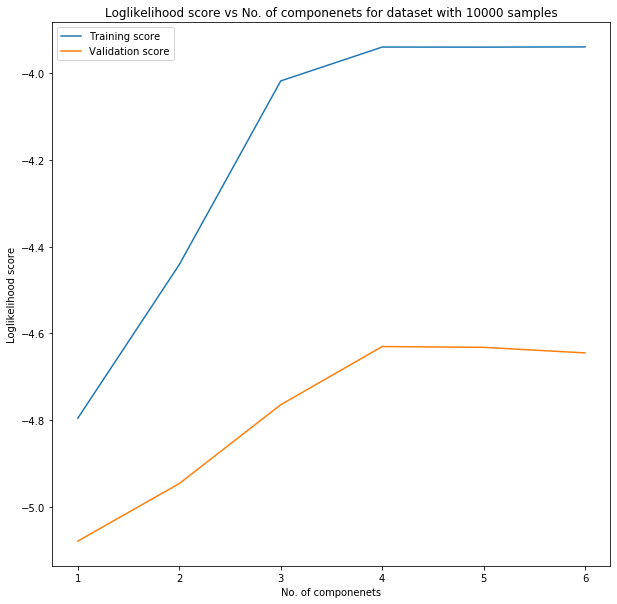

In [0]:
like_plot(train_score,val_score,10000)

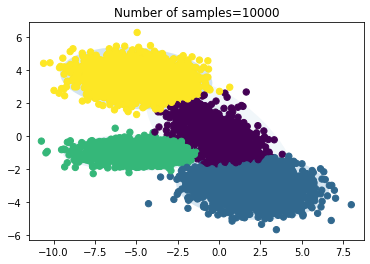

In [0]:
dp=T_data_points[3]
kf = KFold(n_splits=10,shuffle=True)
kf.get_n_splits(dp)
a=4
  
gmm = mixture.GaussianMixture(n_components=a,
                                      covariance_type="full")
gmm.fit(dp)
plot_gmm(gmm,dp)

    